Where to best open a Greek Grocery Store in Toronto

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

**Checking the head of the dataframe df**

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'html.parser')
neededData = soup.find('table',{'class':'wikitable sortable'})
neededData

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3B
</td>
<td>North York
</td>
<td>Don Mills
</td></tr>
<tr>
<td>M4B
</td>
<td>East Y

Object goodData created as list of lists.

In [4]:
goodData=[[l.text.replace('\n','') for l in listline] for listline in [item.find_all('td') for item in [x for x in neededData.find_all('tr')]]]

cast to dataframe:

In [5]:
test=pd.DataFrame(goodData)
test

,0,1,2
0,None,None,None
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M8A,Not assigned,
9,M9A,Etobicoke,Islington Avenue


Cleanse the Data

In [6]:
test.columns=["Postalcode","Borough","Neighbourhood"]
test.replace('',np.nan,regex=True,inplace=True)
test.dropna(how='any',inplace=True)
test.reset_index(inplace = True,drop=True)
print(test.head(5))
print(test.shape)

  Postalcode           Borough                                Neighbourhood
0        M3A        North York                                    Parkwoods
1        M4A        North York                             Victoria Village
2        M5A  Downtown Toronto                    Regent Park, Harbourfront
3        M6A        North York             Lawrence Manor, Lawrence Heights
4        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government
(103, 3)


**Dataset2: GPS Data for Toronto 
From: http://cocl.us/Geospatial_data**

In [7]:
gpsData=pd.read_csv('Geospatial_Coordinates.csv')
gpsData.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merging the Data:

In [8]:
TorontoWithCoordinates = test.merge(gpsData, left_on='Postalcode', right_on='Postal Code').drop(['Postal Code'],axis='columns')
TorontoWithCoordinates

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


**We will check the shape of this dataframe.**

In [9]:
TorontoWithCoordinates.shape

(103, 5)

Data Analysis
We will import some prerequisite data visualization libraries such as matplotlib and seaborn.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Let us check how many pin codes are assigned to each Borough of Toronto.**

In [11]:
boroughs = TorontoWithCoordinates['Borough'].value_counts()

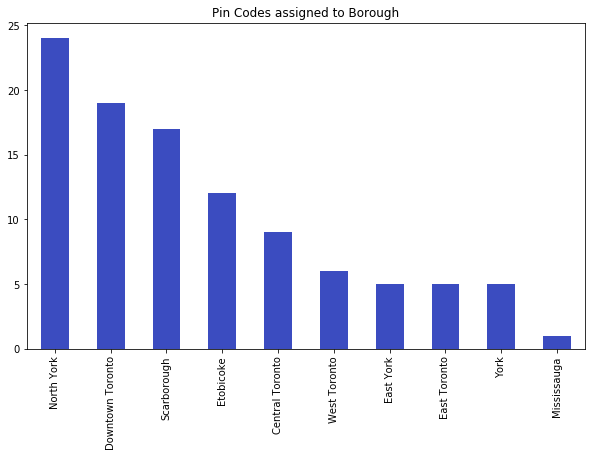

In [12]:
boroughs.plot(kind='bar',title="Pin Codes assigned to Borough",figsize=(10,6),colormap='coolwarm')

Import the required libraries to explore Toronto Neigbourhoods

In [13]:
from geopy.geocoders import Nominatim

from pandas.io.json import json_normalize

# Importing Matplotlib and associated plotting modules

import matplotlib.cm as cm
import matplotlib.colors as colors

# Importing k-means from the clustering algorithms

from sklearn.cluster import KMeans

#Importing Folium, the map rendering library

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


**We will now determine the geographical co-ordinates of Toronto city**

In [14]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


**Let's plot Toronto and the different neighborhoods in our datafram on the map.**

In [16]:
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# Adding markers to the map

for lat, lng, borough, Neighborhood in zip(TorontoWithCoordinates['Latitude'], TorontoWithCoordinates['Longitude'], TorontoWithCoordinates['Borough'], TorontoWithCoordinates['Neighbourhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

**The next step is to define our Foursquare API credentials which we will use further to explore different popular venues in our neighborhoods.**

In [17]:
CLIENT_ID = 'XC515WOYBKIBONMRWKGNEUPNTRHJZ3TQE5H2B0AEMDY4TC2R'
CLIENT_SECRET = 'VBWKW1SNBXBTCH3SIQ4BZSOH0JX35GHNF4ZCZMIJDOCJNMNX'
VERSION = '20180605' #Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: XC515WOYBKIBONMRWKGNEUPNTRHJZ3TQE5H2B0AEMDY4TC2R
CLIENT_SECRET:VBWKW1SNBXBTCH3SIQ4BZSOH0JX35GHNF4ZCZMIJDOCJNMNX


Exploring Downtown Toronto's neighborhoods

In [20]:
downtown = TorontoWithCoordinates[TorontoWithCoordinates['Borough']=='Downtown Toronto']
downtown.reset_index(drop=True, inplace=True)
downtown.head()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


**Let's use the Foursquare API to explore the very first neighborhood of this dataframe.**

In [22]:
nhlatitude = downtown.loc[0, 'Latitude'] # neighborhood latitude value
nhlongitude = downtown.loc[0, 'Longitude'] # neighborhood longitude value

nhname = downtown.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(nhname, 
                                                               nhlatitude, 
                                                               nhlongitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


In [23]:
LIMIT = 100 
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    nhlatitude, 
    nhlongitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=XC515WOYBKIBONMRWKGNEUPNTRHJZ3TQE5H2B0AEMDY4TC2R&client_secret=VBWKW1SNBXBTCH3SIQ4BZSOH0JX35GHNF4ZCZMIJDOCJNMNX&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

In [24]:
import requests

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ebbc7ea69babe001b061b85'},
 'response': {'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.653446723052674,
          'lng': -79.3620167174383}],
        'distance': 143,
       

Venue Category

In [25]:
def categoryType(row):
    try:
        clist = row['categories']
    except:
        clist = row['venue.categories']
        
    if len(clist) == 0:
        return None
    else:
        return clist[0]['name']

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(categoryType, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
3,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
4,Body Blitz Spa East,Spa,43.654735,-79.359874


In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


**We can repeat the same process for all the neighborhoods of Downtown Toronto**

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
toronto_venues = getNearbyVenues(names=downtown['Neighbourhood'],
                                   latitudes=downtown['Latitude'],
                                   longitudes=downtown['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


Observing the data obtained:

In [31]:
toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
5,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
6,"Regent Park, Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park
7,"Regent Park, Harbourfront",43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
8,"Regent Park, Harbourfront",43.65426,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site
9,"Regent Park, Harbourfront",43.65426,-79.360636,Figs Breakfast & Lunch,43.655675,-79.364503,Breakfast Spot


In [32]:
toronto_venues.shape

(1213, 7)

**How many venues were returned for each neighborhood?** 

In [33]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17
Central Bay Street,61,61,61,61,61,61
Christie,17,17,17,17,17,17
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


Data Analysis of Neighbourhoods

**We will use one-hot encoding for this process.**

In [34]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# Adding neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# Moving neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])

toronto_onehot.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [35]:
toronto_onehot.shape

(1213, 204)

In [36]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

toronto_grouped

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.017857,0.035714,0.000000,0.000000,0.00,0.017857,0.017857,0.000000,0.035714,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.017857,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.035714,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.017857,0.053571,0.071429,0.000000,0.000000,0.000000,0.00,0.000000,0.017857,0.000000,0.017857,0.00,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.00,0.000000,0.000000,0.017857,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.017857,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.017857,0.017857,0.000000,0.017857,0.000000,0.00,0.000000,0.000000,0.017

Top 5 venues

In [37]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.07
1  Cocktail Bar  0.05
2      Beer Bar  0.04
3          Café  0.04
4   Cheese Shop  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3   Harbor / Marina  0.06
4           Airport  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1  Italian Restaurant  0.07
2                Café  0.05
3      Sandwich Place  0.05
4        Burger Joint  0.03


----Christie----
                venue  freq
0       Grocery Store  0.24
1                Café  0.18
2                Park  0.12
3  Athletics & Sports  0.06
4           Nightclub  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.08
1     Sushi Restaurant  0.06
2  Japanese Restaurant  0.06
3           Restaurant  0.04
4              

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Appending the most common venues in each neighborhood**

In [39]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Café,Cheese Shop,Seafood Restaurant,Beer Bar,Restaurant,Bakery,Pub,Clothing Store
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Coffee Shop,Boat or Ferry,Rental Car Location,Bar,Plane,Sculpture Garden
2,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Bar,Japanese Restaurant,Thai Restaurant,Salad Place,Ice Cream Shop,Burger Joint
3,Christie,Grocery Store,Café,Park,Coffee Shop,Restaurant,Italian Restaurant,Athletics & Sports,Candy Store,Diner,Nightclub
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Yoga Studio,Pizza Place,Men's Store,Mediterranean Restaurant,Hotel,Gay Bar
5,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Deli / Bodega
6,"First Canadian Place, Underground city",Coffee Shop,Café,Japanese Restaurant,Gym,Hotel,Restaurant,Salad Place,Seafood Restaurant,American Restaurant,Deli / Bodega
7,"Garden District, Ryerson",Clothing Store,Coffee Shop,Italian Restaurant,Cosmetics Shop,Bubble Tea Shop,Café,Middle Eastern Restaurant,Restaurant,Japanese Restaurant,Lingerie Store
8,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Aquarium,Café,Hotel,Restaurant,Italian Restaurant,Scenic Lookout,Sporting Goods Shop,Brewery,Fried Chicken Joint
9,"Kensington Market, Chinatown, Grange Park",Café,Coffee Shop,Bakery,Mexican Restaurant,Vietnamese Restaurant,Bar,Dessert Shop,Vegetarian / Vegan Restaurant,Gaming Cafe,Gourmet Shop


In [45]:
neighborhoods_venues_sorted.shape

(19, 11)

**We will now cluster these neighborhoods. For that, the Neighborhood column can be dropped.**

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\User\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


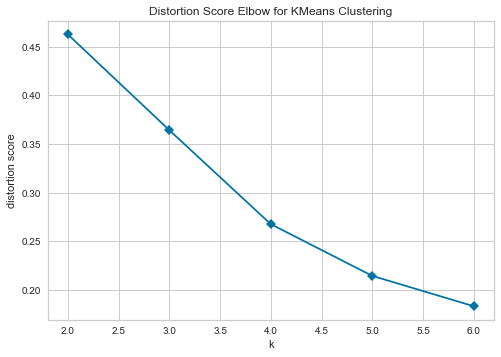

In [50]:
#Using the elbow method to identify the optimal k

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data = toronto_grouped.drop('Neighborhood', 1)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7), timings=False)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [51]:
data = toronto_grouped.drop('Neighborhood', 1)
data

,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.017857,0.035714,0.000000,0.000000,0.00,0.017857,0.017857,0.000000,0.035714,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.017857,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.035714,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.017857,0.053571,0.071429,0.000000,0.000000,0.000000,0.00,0.000000,0.017857,0.000000,0.017857,0.00,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.00,0.000000,0.000000,0.017857,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.017857,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.017857,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.017857,0.017857,0.000000,0.017857,0.000000,0.00,0.000000,0.000000,0.017857,0.017857,0.000000,0.0

**We see that 4 is the most ideal value of k**

In [53]:
# Setting number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 3, 4, 5, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 0])

In [58]:
# Adding clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = downtown

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')


toronto_merged.head(20)

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Park,Café,Breakfast Spot,Restaurant,Pub,Theater,Dessert Shop,Mexican Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Sushi Restaurant,Yoga Studio,Bank,Beer Bar,Sandwich Place,Burrito Place,Café,College Auditorium,Creperie
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Italian Restaurant,Cosmetics Shop,Bubble Tea Shop,Café,Middle Eastern Restaurant,Restaurant,Japanese Restaurant,Lingerie Store
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Cocktail Bar,American Restaurant,Gastropub,Creperie,Clothing Store,Gym,Seafood Restaurant,Beer Bar
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Café,Cheese Shop,Seafood Restaurant,Beer Bar,Restaurant,Bakery,Pub,Clothing Store
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,4,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Bar,Japanese Restaurant,Thai Restaurant,Salad Place,Ice Cream Shop,Burger Joint
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,5,Grocery Store,Café,Park,Coffee Shop,Restaurant,Italian Restaurant,Athletics & Sports,Candy Store,Diner,Nightclub
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,1,Coffee Shop,Café,Restaurant,Deli / Bodega,Clothing Store,Hotel,Thai Restaurant,Gym,Steakhouse,Seafood Restaurant
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,1,Coffee Shop,Aquarium,Café,Hotel,Restaurant,Italian Restaurant,Scenic Lookout,Sporting Goods Shop,Brewery,Fried Chicken Joint
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,1,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Salad Place,Seafood Restaurant,Italian Restaurant,American Restaurant,Beer Bar


**Dropping rows where there is no data available for the neighborhood, and converting the column Cluster Labels as integer**

In [59]:
toronto_merged=toronto_merged.dropna()

In [60]:
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

**Visualizing the clusters in the map**

In [62]:
# create map
map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [63]:
toronto_merged.sort_values(by = 'Cluster Labels',ascending=True, inplace=False)

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,0,Café,Bookstore,Bar,Italian Restaurant,Japanese Restaurant,Bakery,Restaurant,Yoga Studio,Beer Bar,Beer Store
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Park,Café,Breakfast Spot,Restaurant,Pub,Theater,Dessert Shop,Mexican Restaurant
16,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,1,Coffee Shop,Café,Restaurant,Italian Restaurant,Market,Bakery,Pizza Place,Pub,Plaza,Sandwich Place
15,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,1,Coffee Shop,Café,Seafood Restaurant,Cocktail Bar,Restaurant,Beer Bar,Japanese Restaurant,Italian Restaurant,Art Gallery,Bakery
12,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,1,Café,Coffee Shop,Bakery,Mexican Restaurant,Vietnamese Restaurant,Bar,Dessert Shop,Vegetarian / Vegan Restaurant,Gaming Cafe,Gourmet Shop
10,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,1,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Deli / Bodega
17,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,1,Coffee Shop,Café,Japanese Restaurant,Gym,Hotel,Restaurant,Salad Place,Seafood Restaurant,American Restaurant,Deli / Bodega
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,1,Coffee Shop,Aquarium,Café,Hotel,Restaurant,Italian Restaurant,Scenic Lookout,Sporting Goods Shop,Brewery,Fried Chicken Joint
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,1,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Salad Place,Seafood Restaurant,Italian Restaurant,American Restaurant,Beer Bar
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Café,Cheese Shop,Seafood Restaurant,Beer Bar,Restaurant,Bakery,Pub,Clothing Store


Choosing cluster 1 as ideal

In [64]:
toronto_merged[toronto_merged['Cluster Labels'] == 1]

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Park,Café,Breakfast Spot,Restaurant,Pub,Theater,Dessert Shop,Mexican Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Italian Restaurant,Cosmetics Shop,Bubble Tea Shop,Café,Middle Eastern Restaurant,Restaurant,Japanese Restaurant,Lingerie Store
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Cocktail Bar,American Restaurant,Gastropub,Creperie,Clothing Store,Gym,Seafood Restaurant,Beer Bar
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Café,Cheese Shop,Seafood Restaurant,Beer Bar,Restaurant,Bakery,Pub,Clothing Store
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,1,Coffee Shop,Café,Restaurant,Deli / Bodega,Clothing Store,Hotel,Thai Restaurant,Gym,Steakhouse,Seafood Restaurant
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,1,Coffee Shop,Aquarium,Café,Hotel,Restaurant,Italian Restaurant,Scenic Lookout,Sporting Goods Shop,Brewery,Fried Chicken Joint
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,1,Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Salad Place,Seafood Restaurant,Italian Restaurant,American Restaurant,Beer Bar
10,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,1,Coffee Shop,Café,Restaurant,Hotel,Gym,American Restaurant,Seafood Restaurant,Japanese Restaurant,Italian Restaurant,Deli / Bodega
12,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,1,Café,Coffee Shop,Bakery,Mexican Restaurant,Vietnamese Restaurant,Bar,Dessert Shop,Vegetarian / Vegan Restaurant,Gaming Cafe,Gourmet Shop
15,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,1,Coffee Shop,Café,Seafood Restaurant,Cocktail Bar,Restaurant,Beer Bar,Japanese Restaurant,Italian Restaurant,Art Gallery,Bakery


In [65]:
toronto_merged[toronto_merged['Cluster Labels'] == 3]

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.39442,3,Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Coffee Shop,Boat or Ferry,Rental Car Location,Bar,Plane,Sculpture Garden


Postcode M5V

In [68]:
neigh_df = toronto_merged[toronto_merged['Postalcode'] == 'M5V']

neigh_df.head()

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.39442,3,Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Coffee Shop,Boat or Ferry,Rental Car Location,Bar,Plane,Sculpture Garden


Recommendation to the client


*M5V* - **CN Tower, King and Spadina,...**